In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

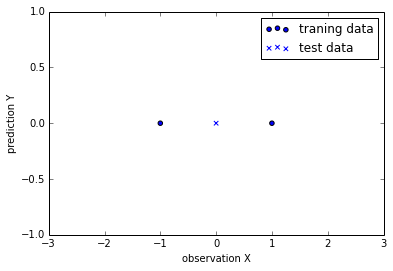

In [16]:

fig = plt.figure()
axis = fig.add_subplot(111)
axis.scatter( [-1, 1], [0, 0], marker='o', label='traning data')
axis.scatter( [0.0], [0], marker='x', label='test data')

axis.set_xlabel('observation X')
axis.set_xlim(-3, 3)
axis.set_ylabel('prediction Y')
axis.set_ylim(-1, 1)
axis.legend()

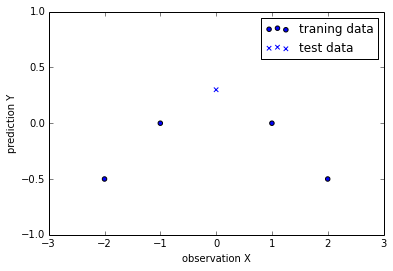

In [21]:

fig = plt.figure()
axis = fig.add_subplot(111)
axis.scatter( [-2, -1, 1, 2], [-0.5, 0, 0, -0.5], marker='o', label='traning data')
axis.scatter( [0.0], [+0.3], marker='x', label='test data')

axis.set_xlabel('observation X')
axis.set_xlim(-3, 3)
axis.set_ylabel('prediction Y')
axis.set_ylim(-1, 1)
axis.legend()

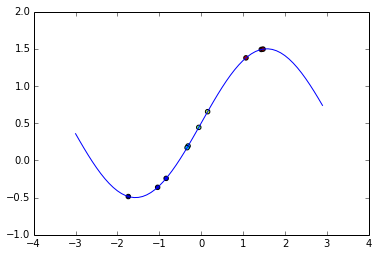

In [28]:
from sklearn import datasets
data_x, data_y = datasets.make_regression(n_samples=100, n_features=1, noise=.0)
y_min_max = (np.max( data_y ) - np.min( data_y ))
#data_y = np.sin( data_y / y_min_max * np.pi * 2.0 )
data_y = (np.sin( data_x ) + 0.5).T[0]

import matplotlib.pyplot as plt
%matplotlib inline

train_x, train_y = data_x[:10], data_y[:10]

x = np.arange(-3.0, 3.0, 0.1)

fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot( x, np.sin(x) + 0.5 )
axis.scatter(train_x, train_y, c=train_y)

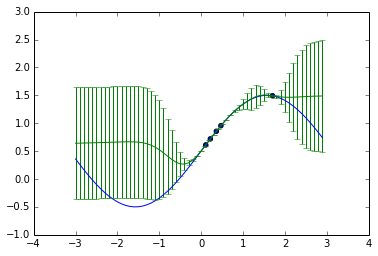

In [52]:
def k(x1, x2, alpha=1.0, ell=0.5):
    d = x1 - x2    
    return alpha * np.exp( - np.dot(d, d) / ell )

def mu(covariance, y):
    _y = np.matmul( covariance, y ).T
    _ =  _y / np.sum( covariance, axis=1 )
    return _

def GP(train_x, train_y, test_x):
    K = np.array( [[k(x, y) for y in train_x] for x in train_x] )

    # for test
    K_star_star = np.array( [[k(x, y) for y in test_x] for x in test_x] )
    K_star = np.array( [[k(x, y) for y in test_x] for x in train_x])
    
    t = np.matmul( K_star.T, np.linalg.pinv(K) )
    mu_star = mu(K_star.T, train_y) + np.matmul(t, (train_y - mu(K, train_y)) )
    sigma_star = K_star_star - np.matmul( t, K_star )
    
    return mu_star, sigma_star

#from sklearn import datasets
#data_x, data_y = datasets.make_regression(n_samples=5, n_features=1, noise=.0)
#y_min_max = (np.max( data_y ) - np.min( data_y ))
#data_y = (np.sin( data_x ) + 0.5).T[0]

train_x, train_y = data_x, data_y
prediction = GP(train_x, train_y, x)
prediction_mean = prediction[0]
prediction_stddev = np.diagonal( prediction[1] )

fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot( x, np.sin(x) + 0.5)
axis.errorbar(x, prediction_mean, prediction_stddev)
axis.scatter(train_x, train_y)

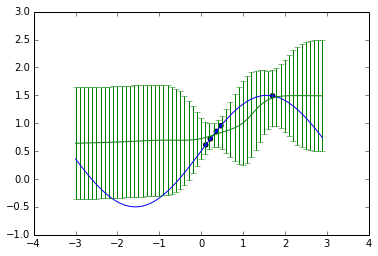

In [55]:
def k(x1, x2, alpha=1.0, ell=0.5):
    d = x1 - x2    
    return alpha * np.exp( - np.dot(d, d) / ell )

def mu(covariance, y):
    _y = np.matmul( covariance, y ).T
    _ =  _y / np.sum( covariance, axis=1 )
    return _

def GP(train_x, train_y, test_x, noise=1.0):
    noise_mat = np.eye( len(train_x) ) * noise
    K = np.array( [[k(x, y) for y in train_x] for x in train_x] ) + noise_mat

    # for test
    K_star_star = np.array( [[k(x, y) for y in test_x] for x in test_x] )
    K_star = np.array( [[k(x, y) for y in test_x] for x in train_x])
    
    t = np.matmul( K_star.T, np.linalg.pinv(K) )
    mu_star = mu(K_star.T, train_y) + np.matmul(t, (train_y - mu(K, train_y)) )
    sigma_star = K_star_star - np.matmul( t, K_star )
    
    return mu_star, sigma_star

#from sklearn import datasets
#data_x, data_y = datasets.make_regression(n_samples=5, n_features=1, noise=.0)
#y_min_max = (np.max( data_y ) - np.min( data_y ))
#data_y = (np.sin( data_x ) + 0.5).T[0]

train_x, train_y = data_x, data_y
prediction = GP(train_x, train_y, x)
prediction_mean = prediction[0]
prediction_stddev = np.diagonal( prediction[1] )

fig = plt.figure()
axis = fig.add_subplot(111)
axis.plot( x, np.sin(x) + 0.5)
axis.errorbar(x, prediction_mean, prediction_stddev)
axis.scatter(train_x, train_y)

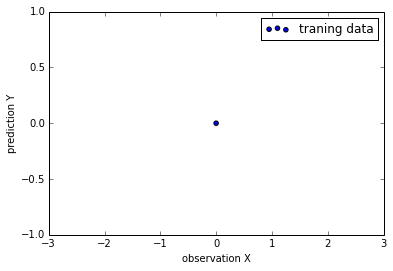

In [56]:

fig = plt.figure()
axis = fig.add_subplot(111)
axis.scatter( [0.0], [0], marker='o', label='traning data')

axis.set_xlabel('observation X')
axis.set_xlim(-3, 3)
axis.set_ylabel('prediction Y')
axis.set_ylim(-1, 1)
axis.legend()

$$c = \sqrt{a^2 + b^2}$$